In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("Mall_Customers.csv")

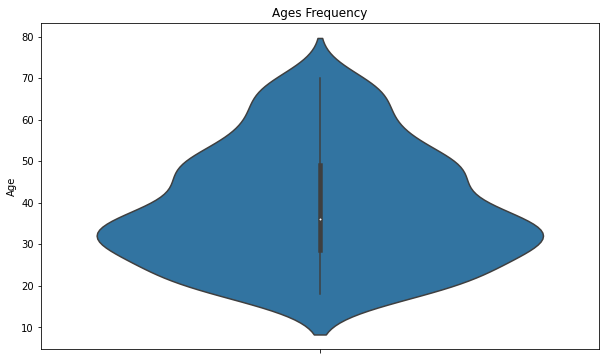

In [3]:
df.drop(["CustomerID"],axis=1,inplace=True)
plt.figure(figsize=(10,6)) #width=10inches, height=6inches
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()


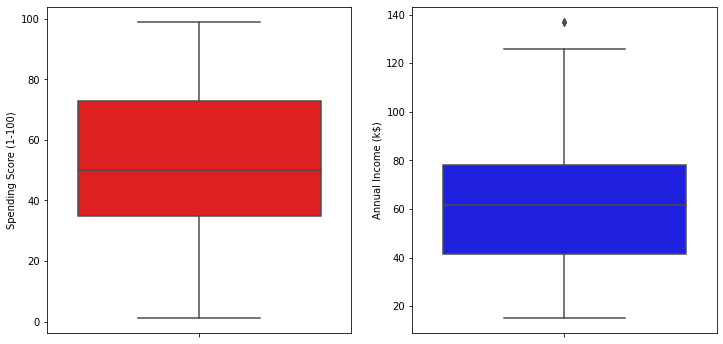

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color = "Red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"], color = "Blue")
plt.show()


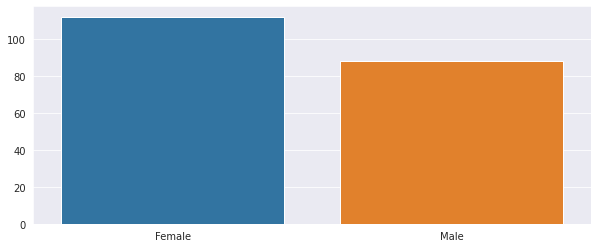

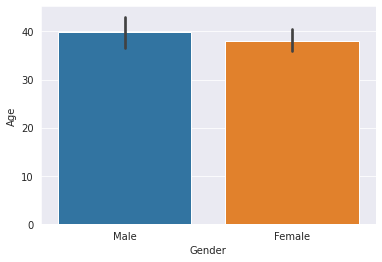

In [5]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x= genders.index, y=genders.values)
plt.show()
sns.barplot(x=df["Gender"], y=df["Age"])
plt.show()


In [6]:
age18_25 = df.Age[(df.Age >= 18) & (df.Age <=25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <=35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >=46) & (df.Age <= 55)]
age55_above =df.Age[(df.Age >=56)]


In [7]:
x = ["18-25" , "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55_above)]


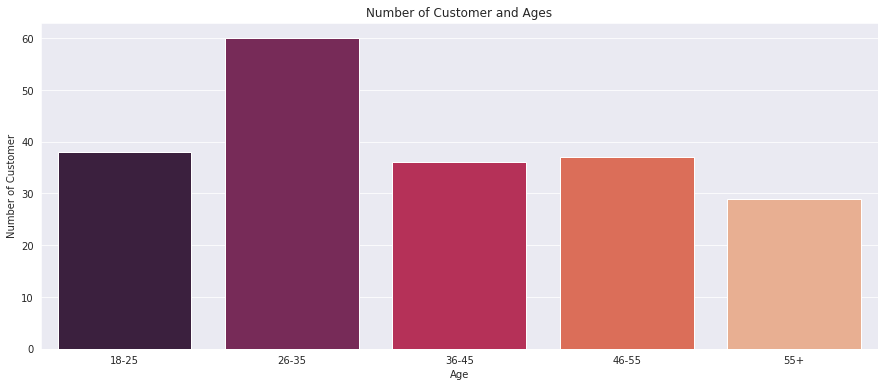

In [8]:
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


In [9]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=1) & (df["Spending Score (1-100)"] <=20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]


In [10]:
ss_x = ["1-20", "21-40", "41-60", "61-80", "80-100"]
ss_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]


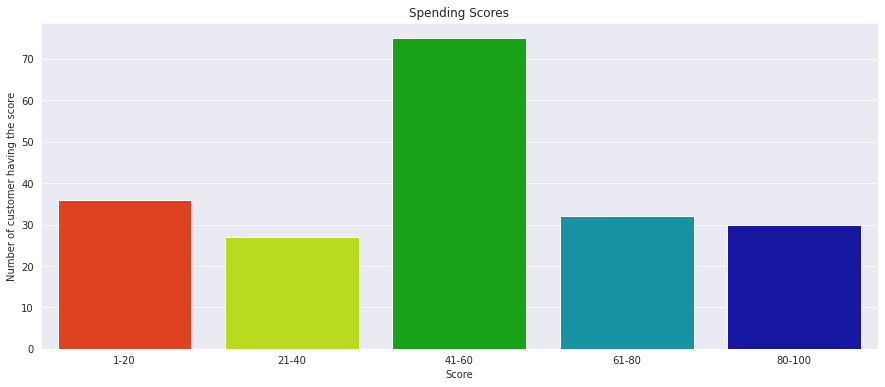

In [11]:
plt.figure(figsize=(15,6))
sns.barplot(x=ss_x, y= ss_y, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of customer having the score")

plt.show()



In [12]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)" ] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)" ] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)" ] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)" ] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)" ] <= 150)]


In [13]:
ai_x = ["$ 0 - 30,000", "$ 30,001 - 60,000" , "$ 60,001 - 90,000" , "$ 90,001 - 12,000" , "$ 12,001 - 150,000"]
ai_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]


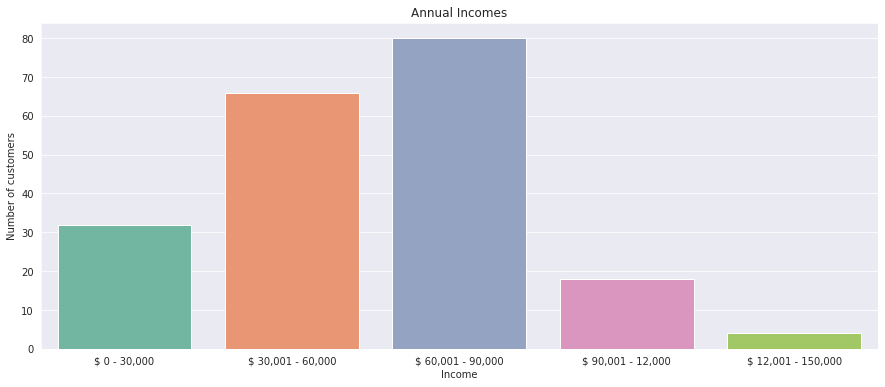

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(x= ai_x, y= ai_y, palette = "Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of customers")
plt.show()


In [15]:
from sklearn.cluster import KMeans
wcss = []
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    km.fit(X2)
    wcss.append(km.inertia_)


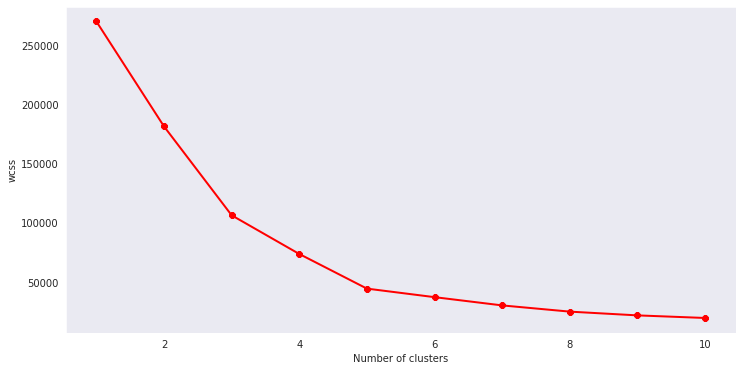

In [16]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2 , color="red", marker="8")
plt.xlabel("Number of clusters")
plt.ylabel('wcss')
plt.show()


In [17]:
km_4 = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_means = km_4.fit_predict(X2)


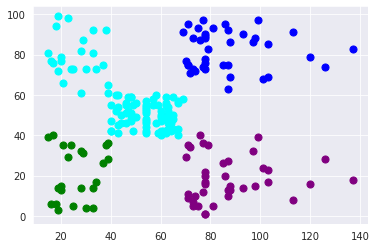

In [18]:
plt.scatter(X2[y_means == 0,0], X2[y_means == 0,1], s=50, c='purple', label='Cluster1')
plt.scatter(X2[y_means == 1,0], X2[y_means == 1,1], s=50, c='blue', label='Cluster2')
plt.scatter(X2[y_means == 2,0], X2[y_means == 2,1], s=50, c='green', label='Cluster3')
plt.scatter(X2[y_means == 3,0], X2[y_means == 3,1], s=50, c='cyan', label='Cluster4')


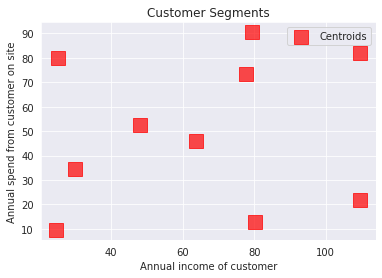

In [19]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=200, marker ='s', c= 'red', alpha=0.7, label= "Centroids")
plt.title('Customer Segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()



In [21]:
km_6 = KMeans(n_clusters = 6, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_means1 = km_6.fit_predict(X2)



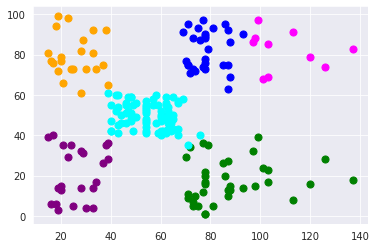

In [22]:
plt.scatter(X2[y_means1 == 0,0], X2[y_means1 == 0,1], s=50, c='purple',  label='Cluster1')
plt.scatter(X2[y_means1 == 1,0], X2[y_means1 == 1,1], s=50, c='blue',    label='Cluster2')
plt.scatter(X2[y_means1 == 2,0], X2[y_means1 == 2,1], s=50, c='green',   label='Cluster3')
plt.scatter(X2[y_means1 == 3,0], X2[y_means1 == 3,1], s=50, c='cyan',    label='Cluster4')
plt.scatter(X2[y_means1 == 4,0], X2[y_means1 == 4,1], s=50, c='magenta', label='Cluster5')
plt.scatter(X2[y_means1 == 5,0], X2[y_means1 == 5,1], s=50, c='orange',  label='Cluster6')


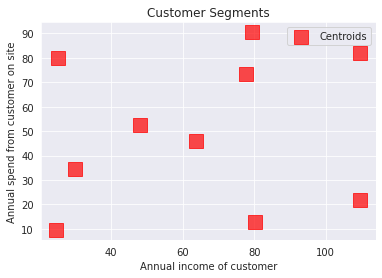

In [23]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=200, marker ='s', c= 'red', alpha=0.7, label= "Centroids")
plt.title('Customer Segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()
